In [31]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving capstone.xlsx to capstone (4).xlsx


In [32]:
import io
df = pd.DataFrame(pd.read_excel(io.BytesIO(uploaded['capstone.xlsx'])))


In [33]:
df.head()

,FIPS_code,County,State,Lung Cancer=risk assessment tool/TNM staging system,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable


In [34]:
df.describe()


,FIPS_code,Lung Cancer=risk assessment tool/TNM staging system,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,...,EQI,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,50.000000,50.000000,50.000000,48.000000,48.000000,2602.000000
mean,30740.508839,69.170907,10.125242,0.505765,0.033273,0.009265,0.079856,12.290988,38.220023,3.067717,...,0.122344,1.505765,57.189008,83.967602,42.526600,1.542600,64.120496,74.504144,10.848558,76.177940
std,15680.442907,17.418000,2.341308,0.500063,0.845161,0.991924,0.863834,10.511386,18.858638,1.896085,...,0.885120,0.500063,16.118834,21.774534,37.839886,10.657343,9.897221,9.807035,10.979733,175.373315
min,1001.000000,12.900000,1.700000,0.000000,-5.115808,-4.809990,-3.992723,-22.440000,-32.970000,-1.150000,...,-3.220000,1.000000,9.200000,17.500000,-32.970000,-70.630000,39.700000,40.840000,-22.440000,3.000000
25%,18027.500000,58.000000,8.452500,0.000000,-0.400679,-0.649570,-0.438983,5.860000,32.460000,2.250000,...,-0.460000,1.000000,46.225000,69.900000,30.252500,1.695000,58.797000,70.618300,4.283850,14.000000
50%,31002.000000,68.600000,10.650000,1.000000,0.174875,0.004630,0.179253,10.520000,35.420000,3.150000,...,0.130000,2.000000,58.300000,82.500000,36.815000,2.905000,62.462450,76.394000,8.531450,28.000000
75%,46080.500000,79.400000,11.860000,1.000000,0.647736,0.617387,0.689862,15.260000,45.590000,3.440000,...,0.750000,2.000000,67.500000,96.200000,50.250000,3.647500,69.900550,78.289300,15.085850,66.000000
max,56045.000000,169.900000,16.910000,1.000000,2.094526,3.979472,3.883786,50.640000,89.590000,10.540000,...,2.850000,2.000000,138.600000,224.400000,255.860000,10.540000,99.800000,96.088200,50.638200,3650.000000


In [35]:
df.isna().any()


FIPS_code                                              False
County                                                 False
State                                                  False
Lung Cancer=risk assessment tool/TNM staging system    False
PM2.5                                                  False
Status Variable                                        False
Land_EQI                                               False
Sociod_EQI                                             False
Built_EQI                                              False
LTD                                                    False
Intercept                                              False
Slope                                                  False
CLU50_1                                                False
PM10                                                   False
SO2                                                    False
NO2                                                    False
O3                      

## This is the first bit of data cleaning
---
We are dropping a lot of columns.

In [36]:
df1=df.drop(['Status Variable','Land_EQI','Sociod_EQI','Intercept','Slope','CLU50_1','EQI','Status','LCI','UCI','Inter','Slp','control','treat','Local_Treat','Disel','Water_EQI','LTD'], axis=1)

## This is a description of all the remaining columns

| Name                               | Use/Meaning                                                                                    |
| ---------------------------------- | ---------------------------------------------------------------------------------------------- |
| FIPS_code                          | An index                                                                                       |
| County                             | This gives us a general location to use.                                                       |
| State                              | This aides the above                                                                           |
| TNM staging system                 | This is the system that determines the likelyhood/ risk of the patient developing lung cancer. |
| PM2.5, PM 10, SO2, NO2, O3, CO, CN | These are the various gases we are tracking.                                                   |
| Other columns                      | Currently testing if required. Will remove on further examination                              |

In [37]:
df1.head()

,FIPS_code,County,State,Lung Cancer=risk assessment tool/TNM staging system,PM2.5,Built_EQI,PM10,SO2,NO2,O3,CO,CN,CS2,Air_EQI,AAC,RT
0,1001,Autauga,AL,73.9,12.06,-0.497301,15.07,10.661088,123.657648,522.38,4.463225,0.054815,0.008080,0.955385,44,stable
1,1003,Baldwin,AL,68.4,11.12,0.401585,19.99,17.146847,247.742253,540.79,12.875833,0.021069,0.001090,0.717964,181,stable
2,1005,Barbour,AL,76.1,12.36,0.048854,15.77,23.257118,183.193624,896.42,19.620539,0.014027,0.000513,0.131007,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,-1.290857,14.92,7.630953,127.779935,563.48,2.951976,0.009613,0.000225,0.065289,23,stable
4,1009,Blount C,AL,73.1,12.97,-1.262740,17.90,8.913795,95.198094,561.94,9.362215,0.022128,0.000429,0.402194,54,stable


<Axes: xlabel='Lung Cancer=risk assessment tool/TNM staging system', ylabel='count'>

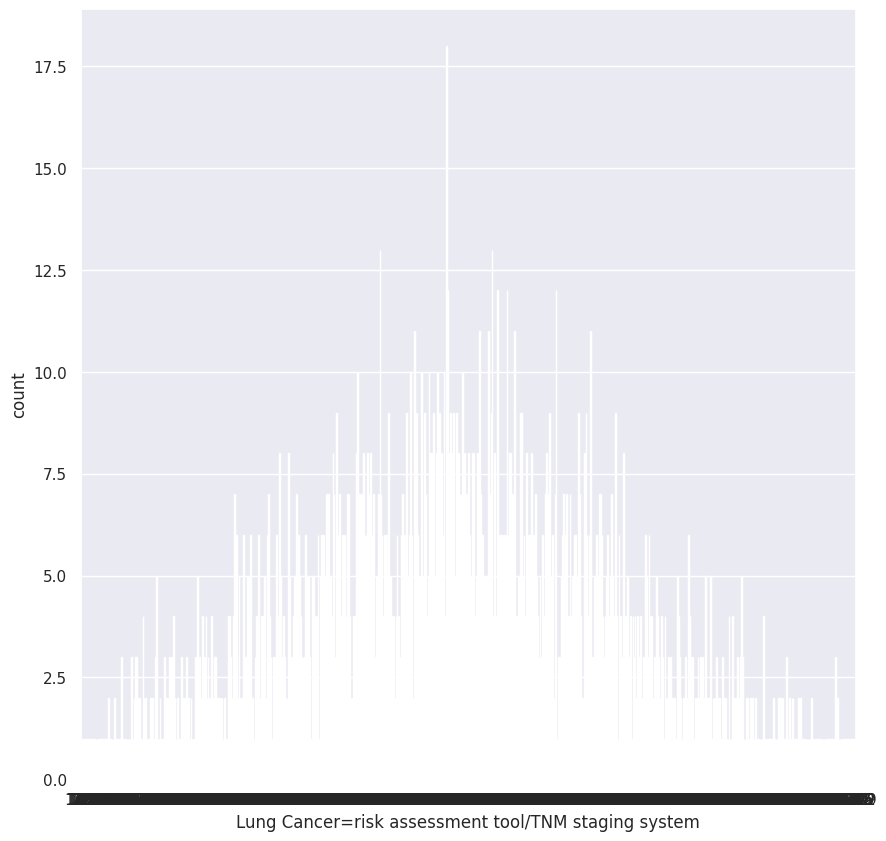

In [38]:
import seaborn as sns
sns.countplot(x='Lung Cancer=risk assessment tool/TNM staging system', data = df1, color='pink')

#### This is to check the distribution of the TNM staging system. As expected it resembles a bell curve.

In [39]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df1['PM2.5'],color='yellow')

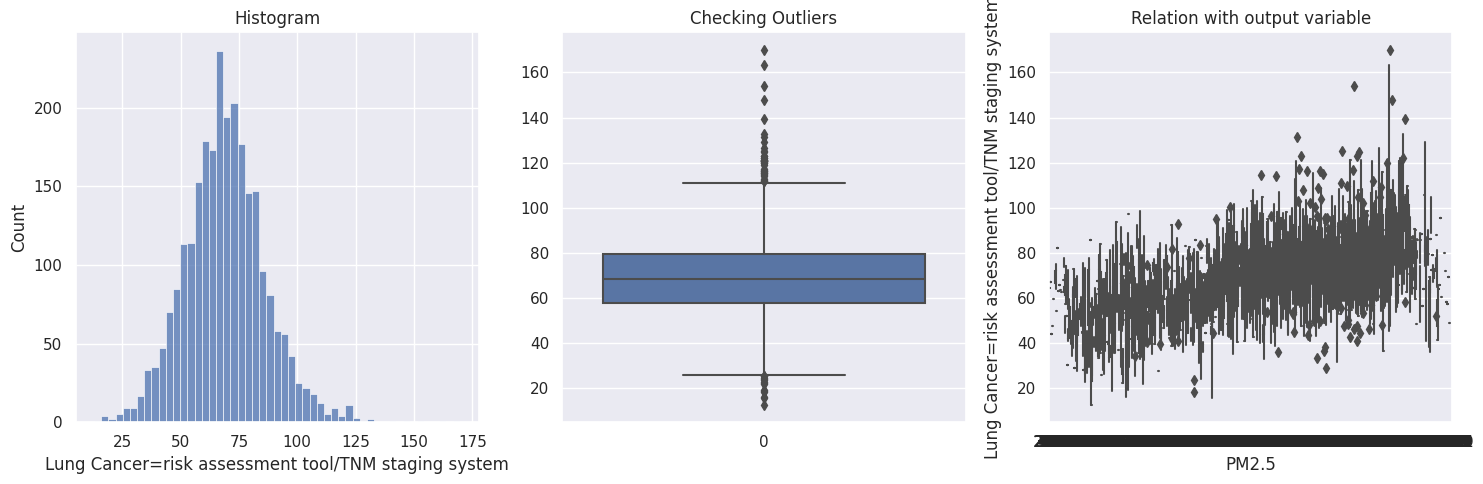

In [40]:
import matplotlib.pyplot as plt
#EDA - Temparature variable
plot_conti(df1['Lung Cancer=risk assessment tool/TNM staging system'])


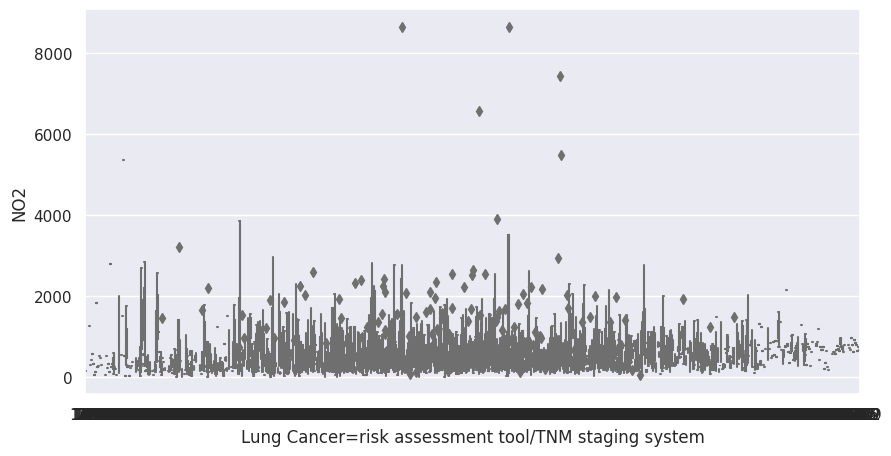

In [41]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.boxplot(x=df1['Lung Cancer=risk assessment tool/TNM staging system'],y=df1['NO2'], color='skyblue')
plt.show()


<ipython-input-42-f30e0676eb9a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df1.corr(),  annot=True)


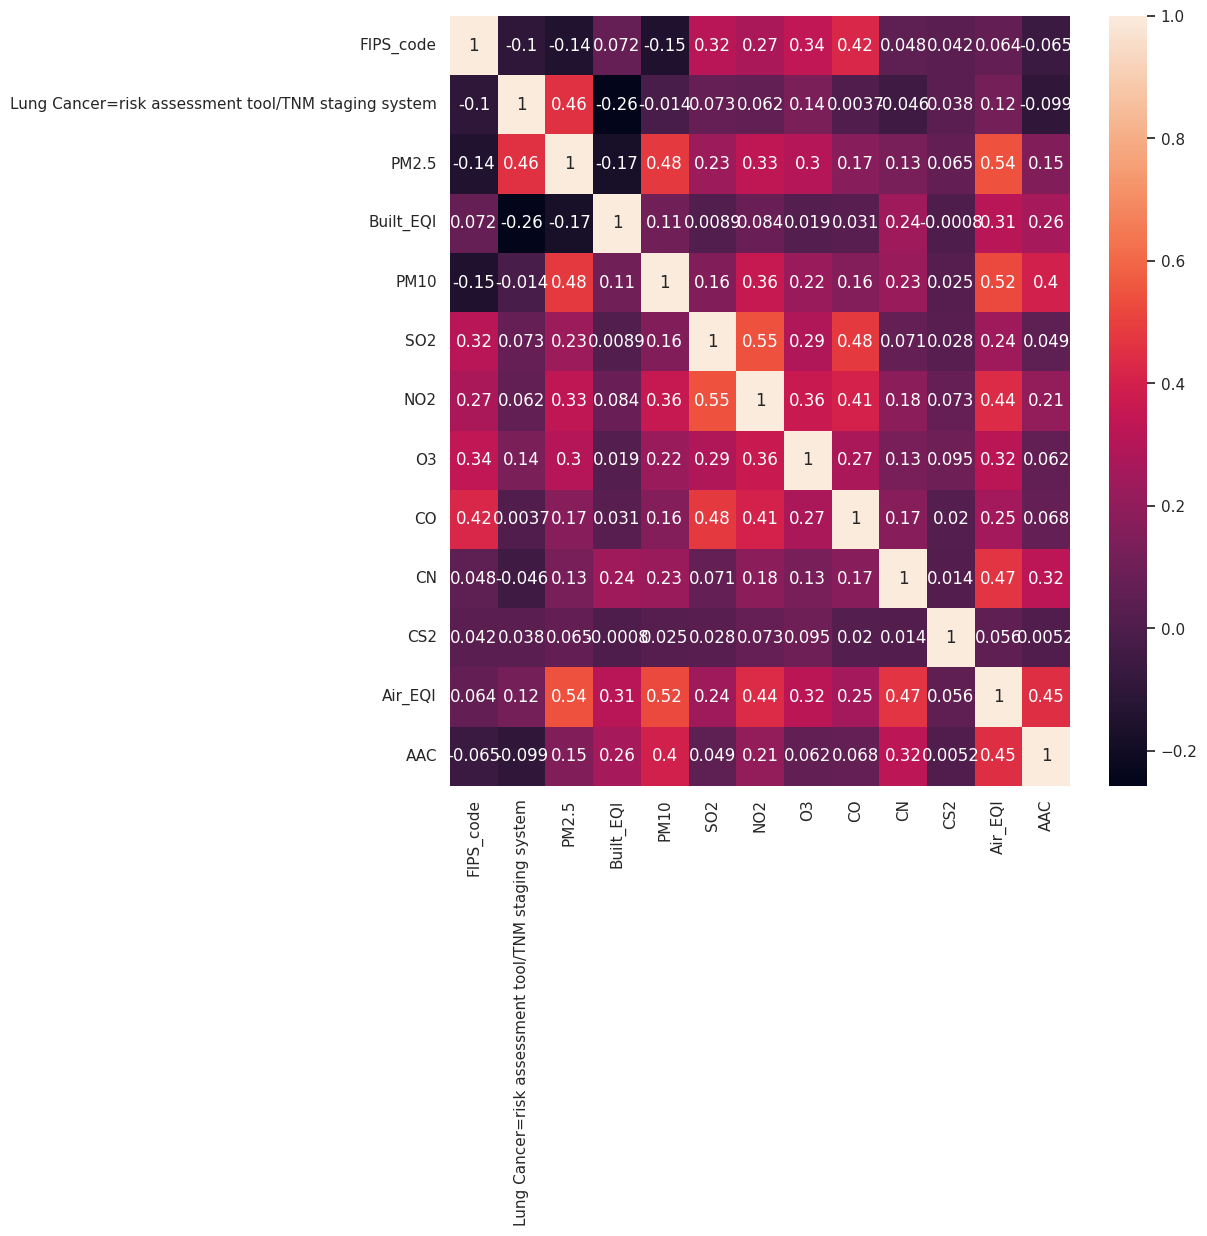

In [42]:
# plt.rcParams['figure.figsize']= 10,10
# plt.matshow(df1.corr())
# plt.yticks(np.arange(df1.shape[1]), df1.columns)
# plt.xticks(np.arange(df1.shape[1]), df1.columns)
# plt.colorbar()
import seaborn as sb
sb.heatmap(df1.corr(),  annot=True)
plt.show()

<ipython-input-43-e827262e6b5b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax=ax)


array([[<Axes: title={'center': 'FIPS_code'}>,
        <Axes: title={'center': 'Lung Cancer=risk assessment tool/TNM staging system'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'Built_EQI'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'CN'}>,
        <Axes: title={'center': 'CS2'}>,
        <Axes: title={'center': 'Air_EQI'}>],
       [<Axes: title={'center': 'AAC'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

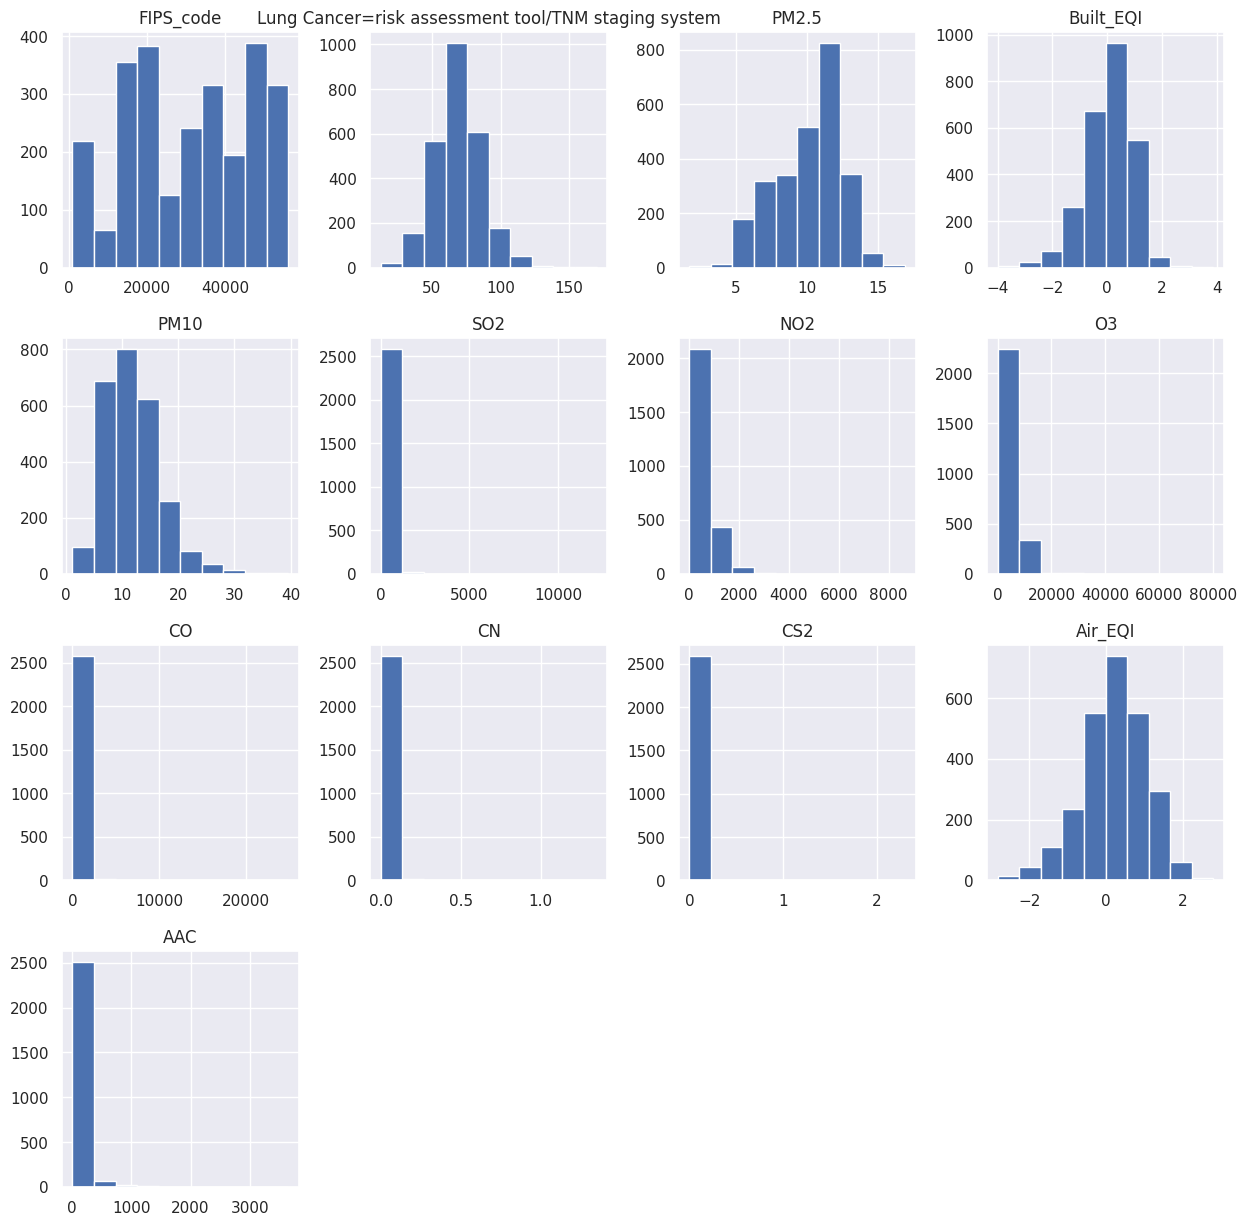

In [43]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df1.hist(ax=ax)

#### These graphs are for us to visualize if the values need to be scaled and normalised. We can see that lot of the gases seem to only have one large spike. We need to either remove the outliers or scale and normalise.

In [46]:
def plot_conti1(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df1['Lung Cancer=risk assessment tool/TNM staging system'],color='yellow')

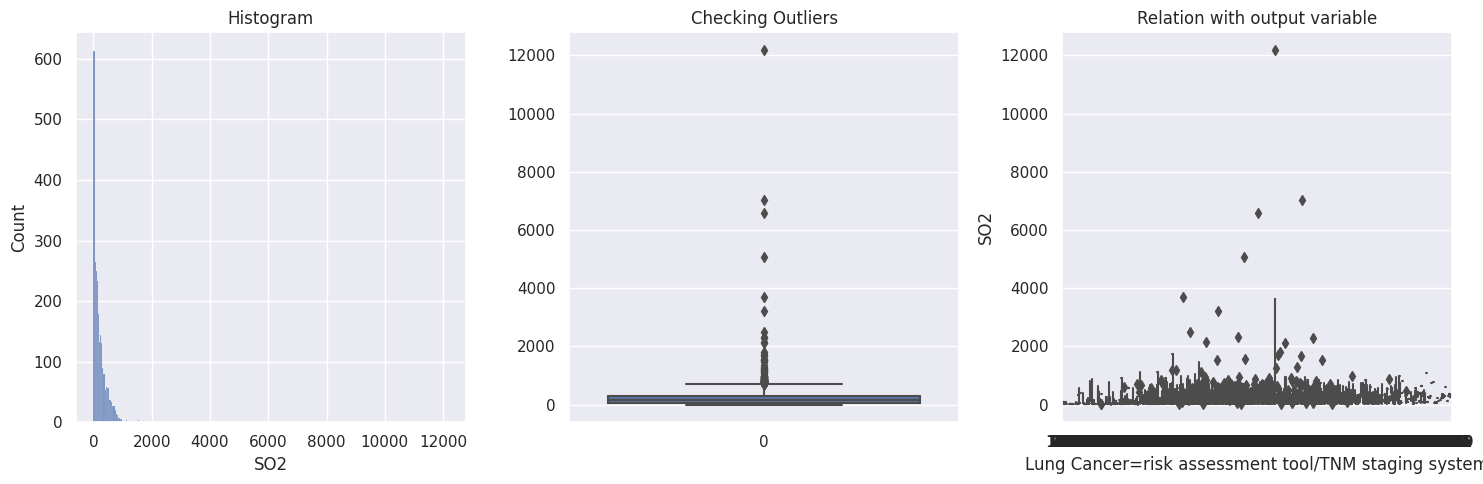

In [47]:
plot_conti1(df1['SO2'])

#### We can see that most of the values are close to each other. We will removes the values that are above the upper quartile range.

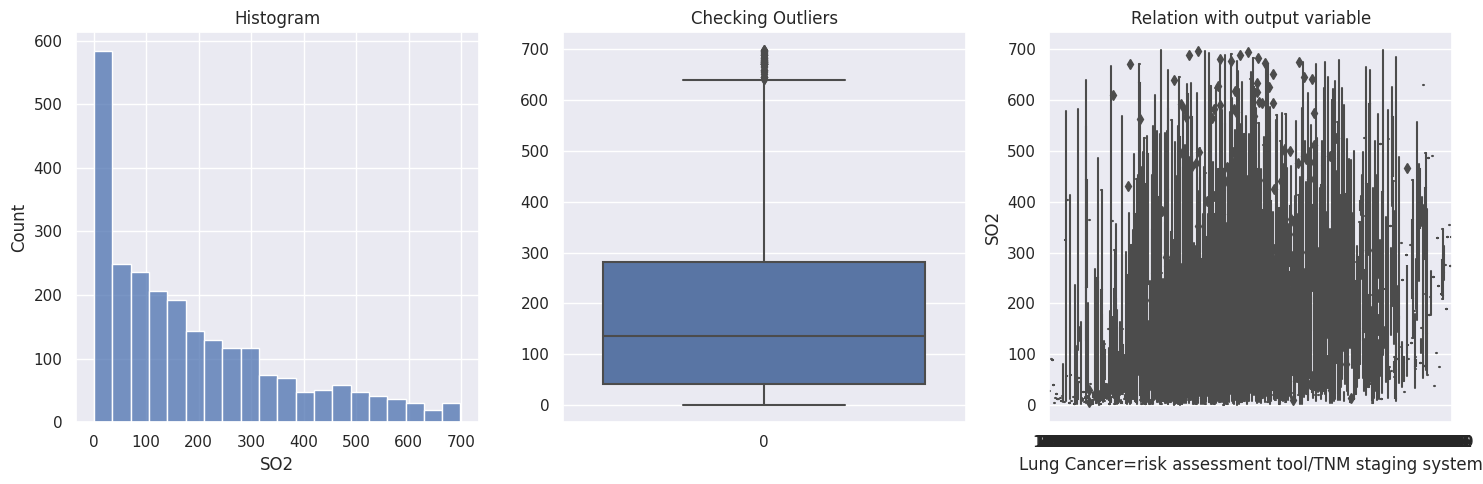

In [48]:
Q1 = df1['SO2'].quantile(0.25)
Q3 = df1['SO2'].quantile(0.75)
IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1['SO2']>=upper)[0]
# lower_array = np.where(df1['bmi']<=lower)[0]

# Removing the outliers
df1.drop(index=upper_array, inplace=True)
# df1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
plot_conti1(df1['SO2'])

#### We can see that we have removed a large portion of the outliers!!! We need to now replicate it for all the other columns wherever required.

In [49]:
from statsmodels.tsa.arima.model import ARIMA
series.index = df1.index.to_period('M')


AttributeError: ignored

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)


In [ ]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [ ]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

In [ ]:
train='Lung Cancer=risk assessment tool/TNM staging system[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)